### 2. EDA

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# todos los datos
df = pd.read_csv("csv/ts.csv", parse_dates=["fecha"],
                   dtype={"especie": "string",
                          "LST_Day": "float64",
                          "LST_Night": "float64",
                          "LST": "float64",
                          "mes": "int"
                         })
df.head(10)

,fecha,especie,LST_Day,LST_Night,LST,mes
0,2020-01-01,estepa,36.280639,11.242220,23.761430,1
1,2020-01-01,pino,30.976251,11.761687,21.368969,1
2,2020-01-09,estepa,33.107195,7.384291,20.245743,1
3,2020-01-09,pino,26.849177,7.588929,17.219053,1
4,2020-01-17,estepa,40.126597,12.101199,26.113898,1
5,2020-01-17,pino,33.924788,13.115697,23.520243,1
6,2020-01-25,estepa,34.904348,8.871062,21.887705,1
7,2020-01-25,pino,28.310403,9.221731,18.766067,1
8,2020-02-02,estepa,34.400693,8.121886,21.261290,2
9,2020-02-02,pino,27.574299,8.396090,17.985194,2


In [13]:
# Temperaturas diurnas
df_d = pd.read_csv("csv/ts_d.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_d.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,36.280639,30.976251,1,5.304388
1,2020-01-09,33.107195,26.849177,1,6.258017
2,2020-01-17,40.126597,33.924788,1,6.201808
3,2020-01-25,34.904348,28.310403,1,6.593945
4,2020-02-02,34.400693,27.574299,2,6.826394
5,2020-02-10,30.593728,25.033515,2,5.560213
6,2020-02-18,31.541956,25.955979,2,5.585977
7,2020-02-26,36.649758,31.037088,2,5.612670
8,2020-03-05,30.742659,25.520392,3,5.222267
9,2020-03-13,28.569933,23.153814,3,5.416119


In [14]:
# Temperaturas nocturnas
df_n = pd.read_csv("csv/ts_n.csv", parse_dates=["fecha"],
    dtype={"pino": "float64",
           "estepa": "float64",
           "mes": "int64",
           "delta": "float64"
          })
df_n.head(10)

,fecha,estepa,pino,mes,delta
0,2020-01-01,11.242220,11.761687,1,-0.519467
1,2020-01-09,7.384291,7.588929,1,-0.204639
2,2020-01-17,12.101199,13.115697,1,-1.014498
3,2020-01-25,8.871062,9.221731,1,-0.350669
4,2020-02-02,8.121886,8.396090,2,-0.274203
5,2020-02-10,9.759583,9.951060,2,-0.191477
6,2020-02-18,7.807707,8.423232,2,-0.615526
7,2020-02-26,10.897478,12.161442,2,-1.263965
8,2020-03-05,8.705064,9.558947,3,-0.853883
9,2020-03-13,5.640340,6.618134,3,-0.977794


In [15]:
# colores para los gráficos
colores = {
    'estepa': '#FF6347',    # Rojo anaranjado
    'pino':   '#2E8B57',    # Verde bosque
    'dia':    '#FFA726',    # Naranja suave
    'noche':  '#4169E1',    # Azul royal
    'train': '#9E9E9E',     # Gris medio
    'test': '#2B2B2B',      # Gris oscuro
    'HW': '#00FA9A',        # Verde menta
    'SARIMA': '#6A5ACD',    # Lavanda
    'SARIMA_IC': '#C5B4E3', # Lavanda claro
    'LSTM': '#E57373'       # Rojo suave
    }

### Exploración de temperaturas por especie y por momento del día

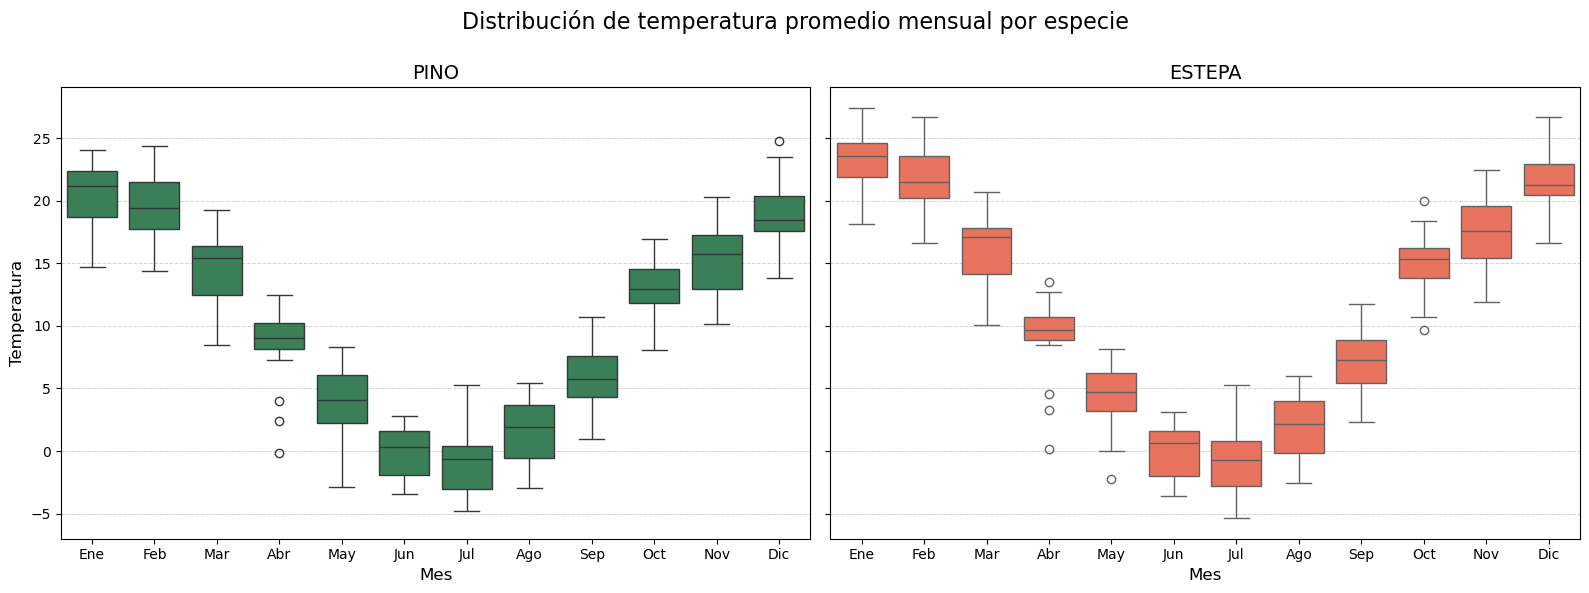

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Distribución de temperatura promedio mensual por especie', fontsize=16)

# Boxplot para temperaturas de pino
sns.boxplot(
    data=df[df['especie']=='pino'],
    x='mes',
    y='LST',
    ax=axes[0],
    color=colores['pino']
)
axes[0].set_title('PINO', fontsize=14)
axes[0].set_ylabel('Temperatura', fontsize=12)

# Boxplot para temperaturas de estepa
sns.boxplot(
    data=df[df['especie']=='estepa'],
    x='mes',
    y='LST',
    ax=axes[1],
    color=colores['estepa']
)
axes[1].set_title('ESTEPA', fontsize=14)
axes[1].set_ylabel('', fontsize=12)

# Ajustar etiquetas de los ejes X
for ax in axes:
    ax.set_xticks(range(0, 12))
    ax.set_xlabel('Mes', fontsize=12)
    ax.set_xticklabels([
        'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
        'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
    ], fontsize=10),
    ax.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

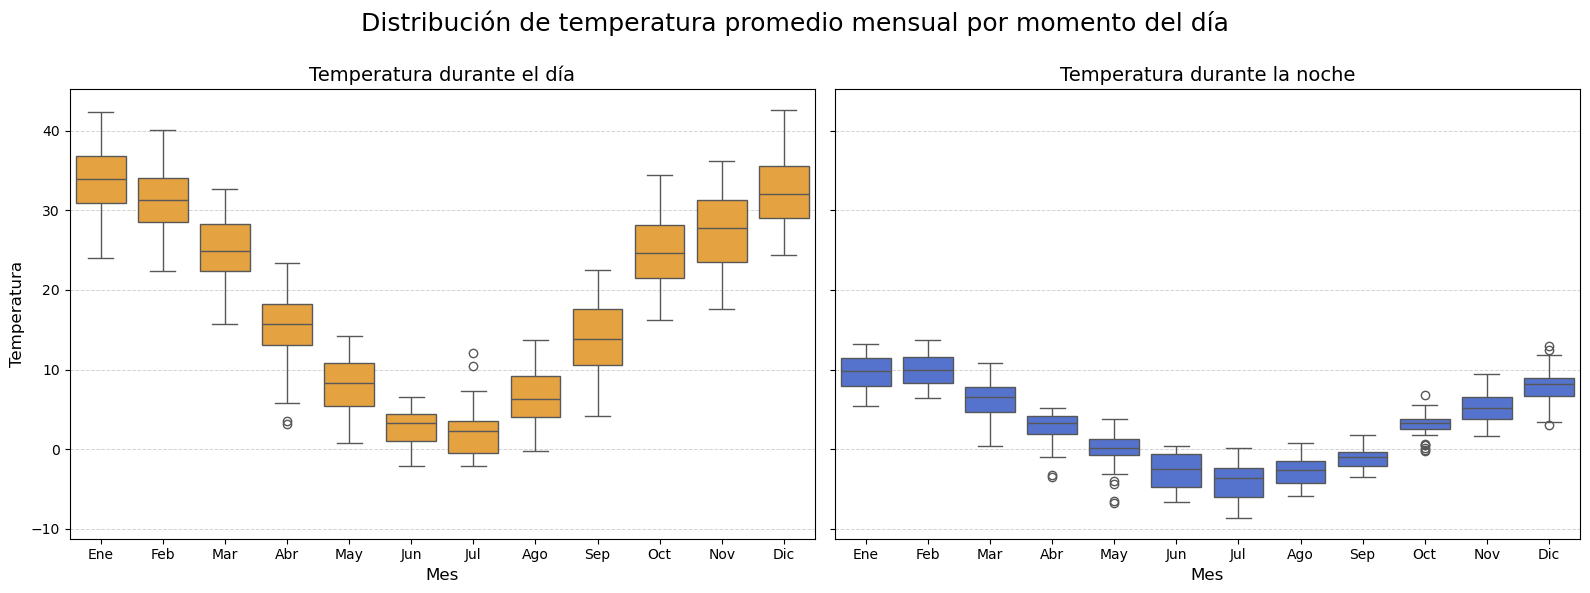

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Distribución de temperatura promedio mensual por momento del día', fontsize=18)

# Boxplot para valores de día
sns.boxplot(
    data=df,
    x='mes',
    y='LST_Day',
    ax=axes[0],
    color=colores['dia']
)
axes[0].set_title('Temperatura durante el día', fontsize=14)
axes[0].set_ylabel('Temperatura', fontsize=12)

# Boxplot para valores de noche
sns.boxplot(
    data=df,
    x='mes',
    y='LST_Night',
    ax=axes[1],
     color=colores['noche']
)
axes[1].set_title('Temperatura durante la noche', fontsize=14)
axes[1].set_ylabel('', fontsize=12)

# Ajustar etiquetas de los ejes X
for ax in axes:
    ax.set_xticks(range(0, 12))
    ax.set_xlabel('Mes', fontsize=12)
    ax.set_xticklabels([
        'Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
        'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'
    ], fontsize=10),
    ax.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Ajustar espacio para el título general
plt.show()

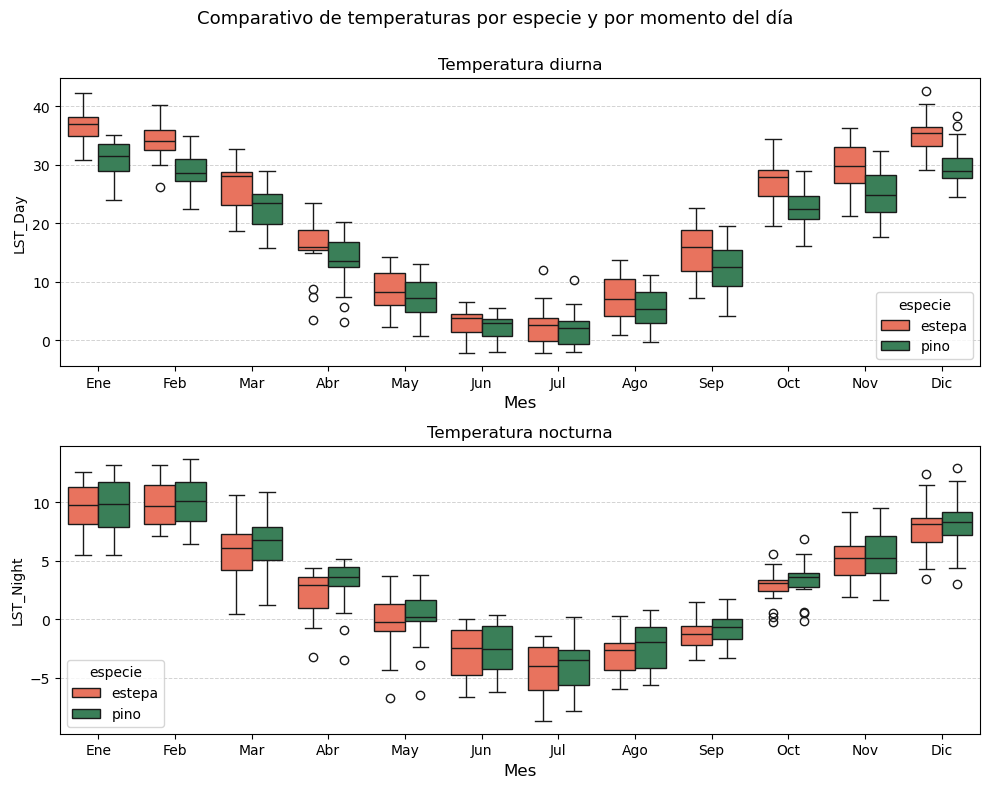

In [18]:
fig, axes = plt.subplots(2,1, figsize=(10, 8)) #, sharey=True)
fig.suptitle('Comparativo de temperaturas por especie y por momento del día', fontsize=13)

sns.boxplot(
    data=df,
    x='mes',
    y='LST_Day',
    hue='especie',
    palette=colores,
    ax=axes[0]
)
axes[0].set_title('Temperatura diurna', fontsize=12)

sns.boxplot(
    data=df,
    x='mes',
    y='LST_Night',
    hue='especie',
    palette=colores,
    ax=axes[1]
)
axes[1].set_title('Temperatura nocturna', fontsize=12)

for i in [0,1]:
    axes[i].set_xlabel('Mes', fontsize=12)
    axes[i].grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)
    axes[i].set_xticks(ticks=range(0, 12), fontsize=10,
                       labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Deltas de temperatura diurna y nocturna

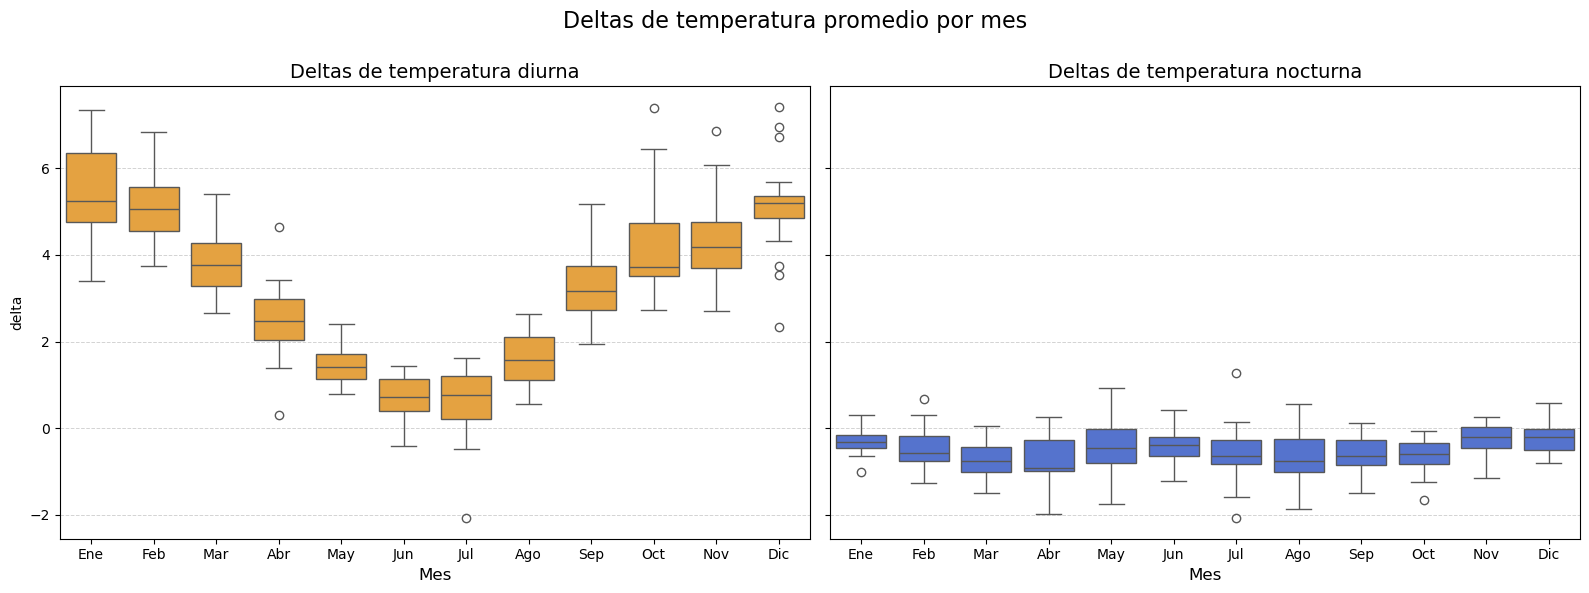

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Deltas de temperatura promedio por mes', fontsize=16)

sns.boxplot(
    data=df_d,
    x='mes',
    y='delta',
    color=colores['dia'],
    ax=axes[0]
)
axes[0].set_title('Deltas de temperatura diurna', fontsize=14)

sns.boxplot(
    data=df_n,
    x='mes',
    y='delta',
    color=colores['noche'],
    ax=axes[1]
)
axes[1].set_title('Deltas de temperatura nocturna', fontsize=14)

for i in [0,1]:
    axes[i].set_xlabel('Mes', fontsize=12)
    axes[i].grid(axis='y', color='lightgray', linestyle='--', linewidth=0.7)
    axes[i].set_xticks(ticks=range(0, 12), fontsize=10,
                       labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                               'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

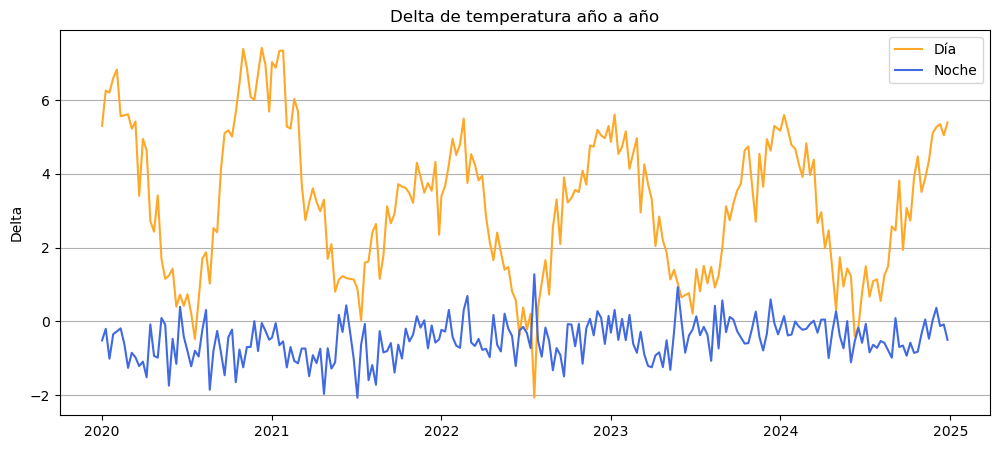

In [20]:
plt.figure(figsize=(12, 5))

plt.plot(df_d['fecha'], df_d['delta'], label='Día', color=colores['dia'])
plt.plot(df_n['fecha'], df_n['delta'], label='Noche', color=colores['noche'])
plt.title('Delta de temperatura año a año')
plt.ylabel('Delta')
plt.grid(axis='y')
plt.legend()
plt.show()